In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df= pd.read_csv("student-por.csv")


In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
df["Mjob"].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [6]:
df["internet"]

0       no
1      yes
2      yes
3      yes
4       no
      ... 
644    yes
645    yes
646     no
647    yes
648    yes
Name: internet, Length: 649, dtype: object

In [7]:
df["Gtotal"] = df["G1"]+ df["G2"]+ df["G3"]

In [8]:
df["Gtotal"]

0      22
1      31
2      37
3      42
4      37
       ..
644    31
645    46
646    32
647    30
648    32
Name: Gtotal, Length: 649, dtype: int64

In [9]:
X = df[["studytime","traveltime"]]
y = df["Gtotal"]
X.shape

(649, 2)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled.shape

(519, 2)

In [14]:
X_test.shape

(130, 2)

In [15]:
X_test_scaled.shape

(130, 2)

# 🔄 `fit_transform()` vs `transform()`: The Golden Rule

Knowing the difference prevents **Data Leakage** (the biggest mistake in Data Science).

---

## 1. Analogy: The Tailor and the Suit 🧵
Imagine you go to a tailor.
* **Fit (Learning):** The tailor takes your measurements with a tape. (The model learns the Mean and Standard Deviation).
* **Transform (Action):** The tailor cuts the fabric based on those measurements. (The model changes the data).

---

## 2. Where to Use What? 🚦

| Dataset | Function to Use | Why? |
| :--- | :--- | :--- |
| **Train Set** | `.fit_transform()` | **Measure + Cut.** Learn the statistics (Mean/Std) from the training data AND apply them. |
| **Test Set** | `.transform()` | **Cut Only.** Do NOT take new measurements! Use the rules learned from the Train Set to scale the Test Set. |

---

## 3. The Fatal Error: Fitting the Test Set 🚫
If you use `.fit()` or `.fit_transform()` on `X_test`:

1.  The model learns the "answers" from the Test Set (cheating).
2.  Your accuracy score becomes artificially high.
3.  In the real world (Production), the model will fail.

---

## 💻 The Correct Code Pattern

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# ✅ STEP 1: Train Set -> FIT + TRANSFORM
# (Calculate the class average and grade the students)
X_train_scaled = scaler.fit_transform(X_train)

# ✅ STEP 2: Test Set -> TRANSFORM ONLY
# (Grade the new student using the OLD class average)
X_test_scaled = scaler.transform(X_test) 
# NEVER FIT THE TEST SET!

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)
y_predi= model.predict(X_test_scaled)

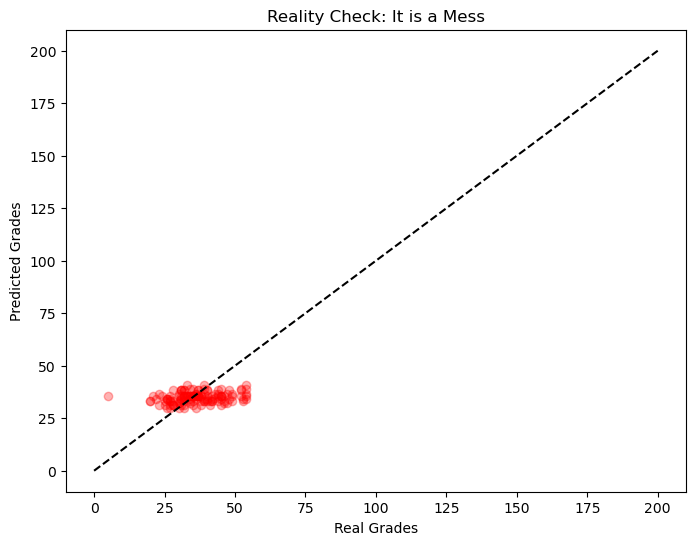

In [18]:
# The plot will look like a messy cloud because the model is confused.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predi, color='red', alpha=0.3)
plt.plot([0, 200], [0, 200], 'k--') # The Target Line
plt.xlabel("Real Grades")
plt.ylabel("Predicted Grades")
plt.title("Reality Check: It is a Mess")
plt.show()

In [19]:
df[df.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Gtotal


In [20]:
df["sex"].value_counts()

sex
F    383
M    266
Name: count, dtype: int64

In [21]:
df["school"].value_counts()

school
GP    423
MS    226
Name: count, dtype: int64

In [22]:
df["famsize"].value_counts()

famsize
GT3    457
LE3    192
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='Count'>

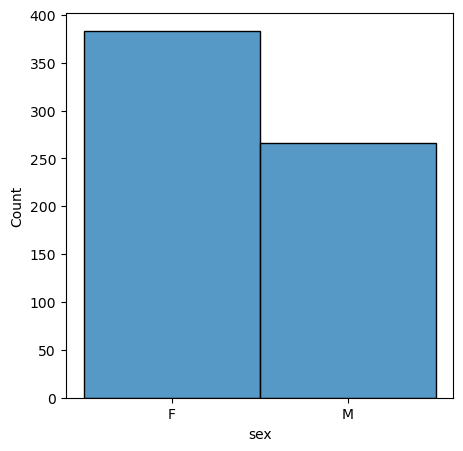

In [23]:
plt.figure(figsize=(5,5))
sns.histplot(data=df,x="sex")

<Axes: ylabel='sex'>

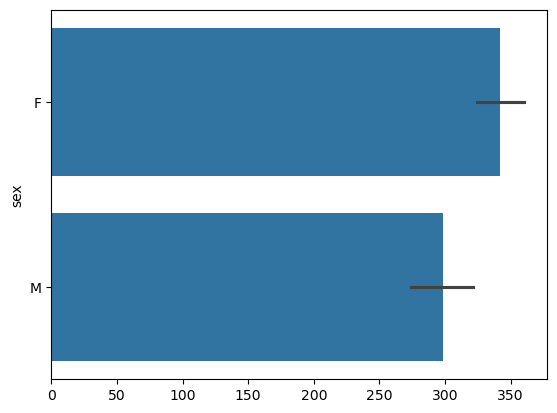

In [24]:
sns.barplot(data=df["sex"])


<Axes: xlabel='count', ylabel='sex'>

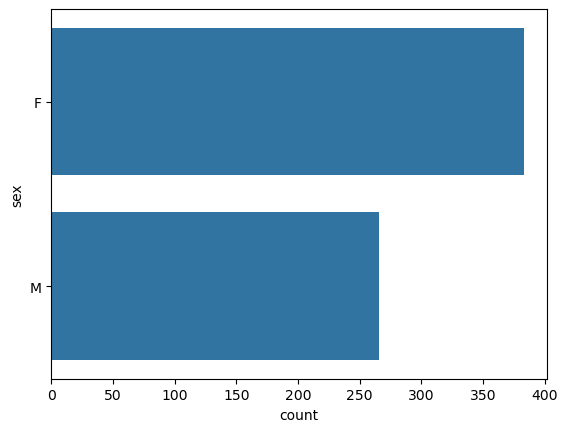

In [25]:
sns.countplot(data=df["sex"])

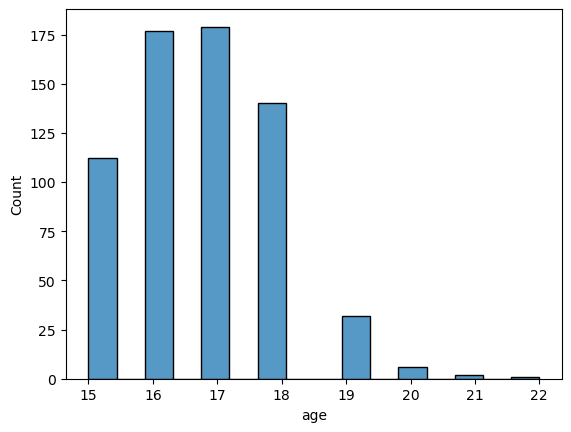

In [26]:
sns.histplot(df["age"])
plt.show()

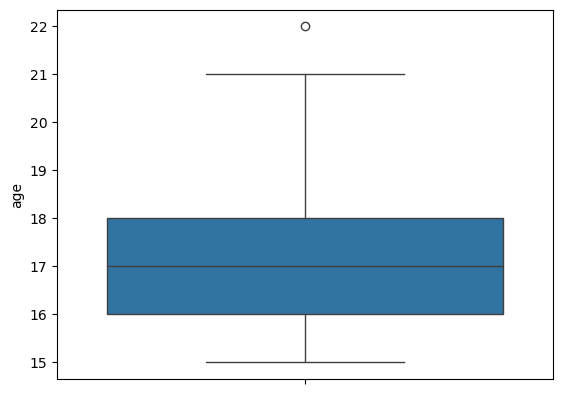

In [27]:
sns.boxplot(df["age"])
plt.show()

# Step 6: Bivariate Analysis (Comparing Two Variables)

## 1. What is it?
**Bivariate Analysis** is the analysis of **two** variables to determine the empirical relationship between them. "Bi" means two.

## 2. Why do we do it?
In the previous step (Univariate Analysis), we summarized a single variable. Now, we want to understand:
* **Correlations:** Does one variable increase when the other increases?
* **Causation Clues:** Does studying time affect grades?

## 3. Our Goal
We will examine the relationship between a student's **Age** and their **Final Grade (G3)**.
* **Independent Variable ($X$):** `age`
* **Dependent Variable ($Y$):** `G3`

## 4. The Visualization
For two numerical variables, the standard plot is a **Scatter Plot**.
* It shows every data point as a dot.
* Patterns (lines, curves, clouds) help us see the relationship.

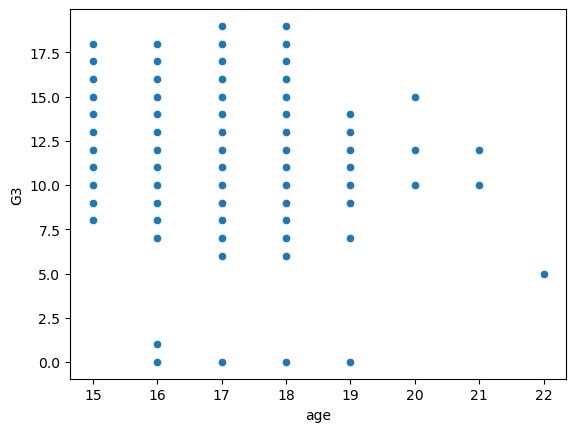

In [28]:
sns.scatterplot(data=df,x="age",y="G3")
plt.show()

Text(0.5, 0, 'AGE')

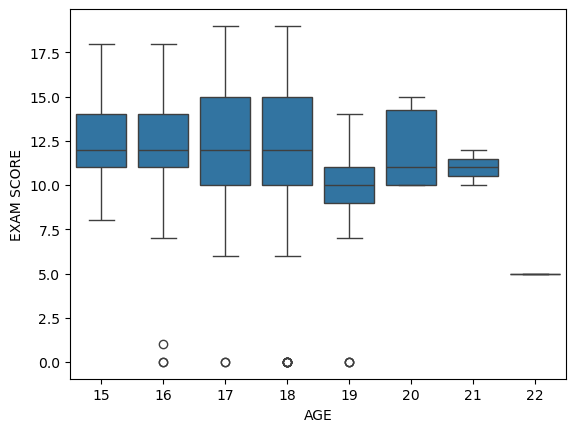

In [29]:
sns.boxplot(data=df,x=df["age"],y=df["G3"])
plt.ylabel("EXAM SCORE")
plt.xlabel("AGE")

# Step 7: Multivariate Analysis (Correlation Heatmap)

## 1. What is it?
**Multivariate Analysis** looks at the relationship between **more than two** variables at once.

## 2. The Tool: Correlation Matrix
We calculate the correlation coefficient ($r$) for every pair of numerical variables.
* **Range:** -1 to +1.
* **High Correlation:** Closer to 1 or -1 (Strong relationship).
* **Low Correlation:** Closer to 0 (No relationship).

## 3. The Visualization: Heatmap
A **Heatmap** uses color to represent these numbers.
* **Red/Hot:** Strong Positive Correlation.
* **Blue/Cold:** Strong Negative Correlation.
* This helps us spot patterns instantly across the whole dataset.

In [30]:
numerical_columns = df.select_dtypes(include="number")
categorical_colums= df.select_dtypes(include="object")

<Axes: >

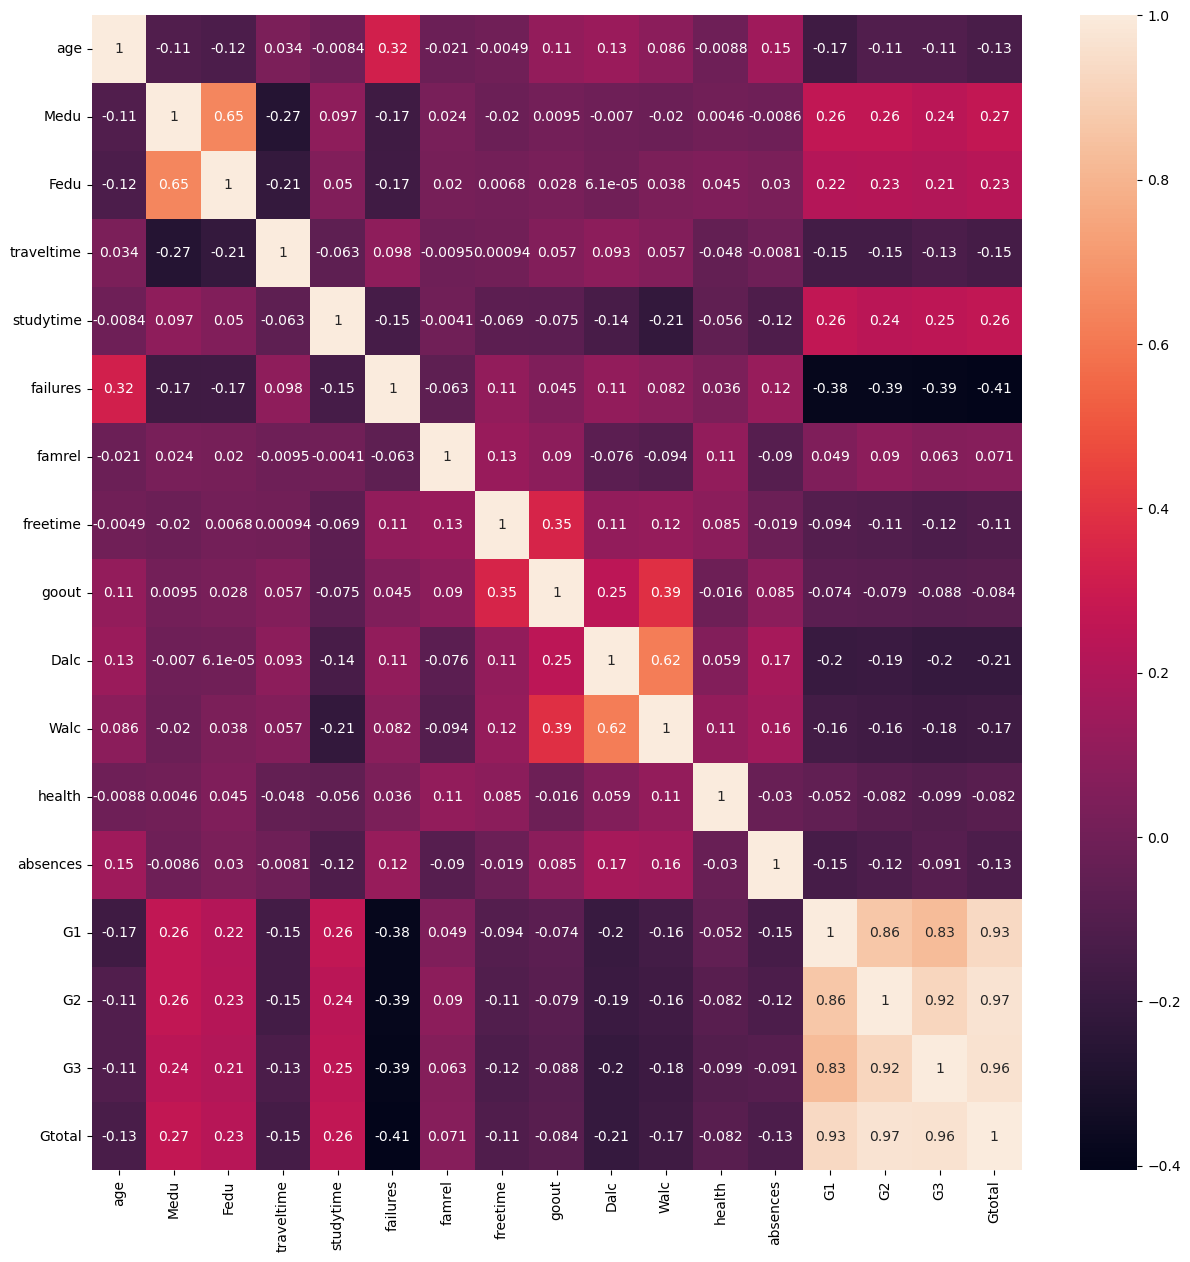

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(numerical_columns.corr(),annot=True)

# Summary: Correlation Analysis & Feature Selection

## 1. Reading the Heatmap: The Story of Our Data
The correlation heatmap gives us a "bird's-eye view" of how variables interact. Here is what the numbers tell us about student performance:

### The "Power" Players (Strong Positive Correlations)
* **$G2$ vs $G3$ ($r = 0.92$):** This is an extremely strong relationship. It tells us that performance is consistent. If a student does well in the second term ($G2$), they are almost guaranteed to do well in the final term ($G3$).
* **$G1$ vs $G2$ ($r = 0.86$):** Success starts early. A good start ($G1$) leads to a good middle ($G2$).

### The "Negative" Influences
* **Failures vs $G3$ ($r = -0.39$):** This is a moderate negative correlation. As the number of past class failures increases, the final grade decreases. This is logical: struggling in the past is a warning sign for the future.

### The Surprises
* **Absences vs $G3$ ($r = -0.09$):** This correlation is surprisingly close to 0. In this specific dataset, missing school does not show a strong direct link to lower grades. This suggests that students might be absent for reasons that don't hurt their academic ability (e.g., school trips, illness where they catch up later).

---

## 2. Feature Selection Strategies: Two Different Goals
When building a Machine Learning model, "which variables do I pick?" is the most important question. The answer depends on your goal.

### Scenario A: The Prediction Model ("Accuracy is King")
* **Goal:** To guess the final grade ($G3$) as precisely as possible.
* **Selected Features:** `G1` and `G2`.
* **Why:** Past behavior is the best predictor of future behavior. Since the correlation is nearly perfect ($0.92$), these variables give us the highest accuracy.
* **Trade-off:** This model is **reactive**. It tells us a student will fail *after* they have already received bad grades in terms 1 and 2. It is too late to change the outcome significantly.

### Scenario B: The Intervention Model ("Early Warning System")
* **Goal:** To identify at-risk students *before* the school year starts (or early in the year) to help them.
* **Selected Features:** `studytime`, `Medu` (Mother's Edu), `Fedu` (Father's Edu).
* **Why:** These are "root causes" or background factors. We know them before the first exam.
* **Trade-off:** The correlation is lower ($~0.25$), so the model will be less accurate. However, it is **proactive**. It allows teachers to provide support (e.g., study groups) before a student ever gets a bad grade.

### Conclusion
* For a **Kaggle competition** or pure data science task: Choose **Scenario A**.
* For a **real-world school policy** program: Choose **Scenario B**.

<Axes: xlabel='Mjob', ylabel='G3'>

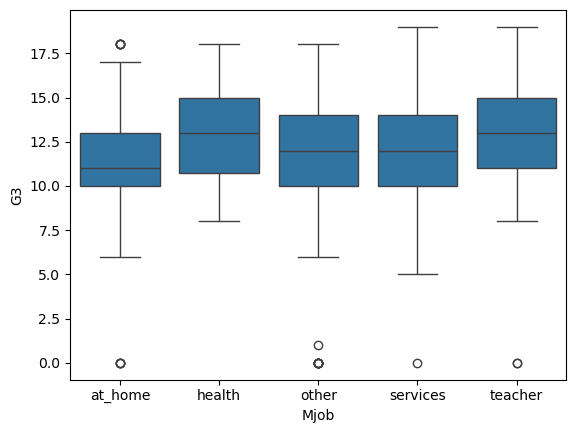

In [32]:
sns.boxplot(data=df,x="Mjob",y="G3")

In [33]:
df2=df.copy()
df2["scholl"] = np.where(df["school"]=="GP","1","0")

In [34]:
df2.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Gtotal', 'scholl'],
      dtype='object')

In [35]:
df["internet"].unique()

array(['no', 'yes'], dtype=object)

In [36]:
mapping= {"yes":1,"no":0}
df["internet"]=df["internet"].map(mapping)


In [37]:
df["internet"]

0      0
1      1
2      1
3      1
4      0
      ..
644    1
645    1
646    0
647    1
648    1
Name: internet, Length: 649, dtype: int64

In [38]:
df=pd.get_dummies(df,columns=["Mjob"],drop_first=True)

In [39]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Fjob,reason,...,health,absences,G1,G2,G3,Gtotal,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
0,GP,F,18,U,GT3,A,4,4,teacher,course,...,3,4,0,11,11,22,False,False,False,False
1,GP,F,17,U,GT3,T,1,1,other,course,...,3,2,9,11,11,31,False,False,False,False
2,GP,F,15,U,LE3,T,1,1,other,other,...,3,6,12,13,12,37,False,False,False,False
3,GP,F,15,U,GT3,T,4,2,services,home,...,5,0,14,14,14,42,True,False,False,False
4,GP,F,16,U,GT3,T,3,3,other,home,...,5,0,11,13,13,37,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,other,course,...,5,4,10,11,10,31,False,False,True,False
645,MS,F,18,U,LE3,T,3,1,services,course,...,1,4,15,15,16,46,False,False,False,True
646,MS,F,18,U,GT3,T,1,1,other,course,...,5,6,11,12,9,32,False,True,False,False
647,MS,M,17,U,LE3,T,3,1,services,course,...,2,6,10,10,10,30,False,False,True,False


However, we actually do not need to encode everything. Here is the rule:

Text (Strings): Must be encoded (e.g., "yes", "teacher", "GP").

Numbers: Do not need encoding (e.g., 1, 2, 3, 4).

Let's check the columns you mentioned for Scenario B:

studytime: It contains numbers 1, 2, 3, 4 (1 means <2 hours, 4 means >10 hours). The computer already understands this order. No encoding needed.

Medu / Fedu: These are numbers 0 to 4 (Education Level). No encoding needed.

higher / internet: You already encoded these! (Changed "yes" to 1).

Mjob: You already encoded this using get_dummies.

In [40]:
feature_cols = [
    'studytime', 'Medu', 'Fedu', 'higher', 'internet', 
    'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher'
]

X = df[feature_cols]
y = df['G3']

In [41]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
X_train

,studytime,Medu,Fedu,higher,internet,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
332,3,2,2,yes,1,False,False,False,False
29,2,4,4,yes,1,False,False,False,True
302,3,3,2,yes,0,False,True,False,False
286,1,2,1,yes,1,False,True,False,False
554,1,1,1,no,1,False,False,False,False
...,...,...,...,...,...,...,...,...,...
71,4,4,2,yes,1,False,True,False,False
106,4,2,2,yes,1,False,True,False,False
270,1,4,4,yes,1,False,False,True,False
435,2,1,1,yes,1,False,False,False,False


In [43]:
mapping= {"yes":1,"no":0}

df["higher"]=df["higher"].map(mapping)

from sklearn.model_selection import train_test_split

feature_cols = [
    'studytime', 'Medu', 'Fedu', 'higher', 'internet', 
    'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher'
]

X = df[feature_cols]
y = df['G3']

X_train , X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train


,studytime,Medu,Fedu,higher,internet,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
332,3,2,2,1,1,False,False,False,False
29,2,4,4,1,1,False,False,False,True
302,3,3,2,1,0,False,True,False,False
286,1,2,1,1,1,False,True,False,False
554,1,1,1,0,1,False,False,False,False
...,...,...,...,...,...,...,...,...,...
71,4,4,2,1,1,False,True,False,False
106,4,2,2,1,1,False,True,False,False
270,1,4,4,1,1,False,False,True,False
435,2,1,1,1,1,False,False,False,False


In [44]:
from sklearn.linear_model import LinearRegression

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)
print("\nSUCCESS! The model is trained.")
print("Model Coefficients:", model.coef_)
X_train.columns


SUCCESS! The model is trained.
Model Coefficients: [0.76866206 0.14523513 0.26207162 2.51762464 0.69522388 0.94410388
 0.41366346 0.18704246 0.68412054]


Index(['studytime', 'Medu', 'Fedu', 'higher', 'internet', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher'],
      dtype='object')

In [52]:
model.predict(X_test.iloc[[1]])

array([11.90447913])

In [51]:
X_test.iloc[[1]]

,studytime,Medu,Fedu,higher,internet,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
220,2,3,1,1,1,False,False,True,False


In [54]:
df["G3"].describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

<Axes: >

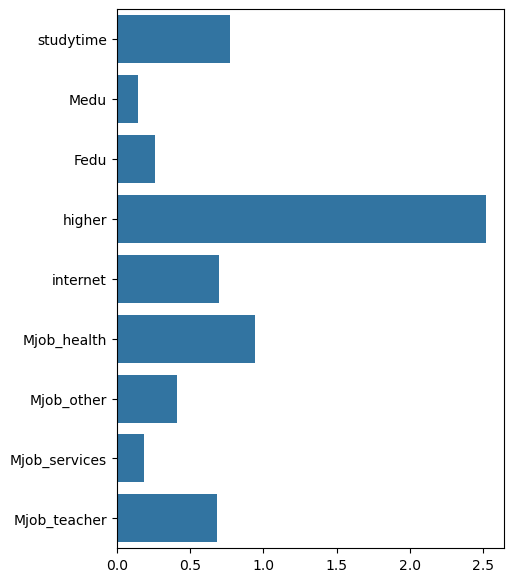

In [66]:
plt.figure(figsize=(5,7))
sns.barplot(x=model.coef_,y=feature_cols)

# Interpreting the Model: What Actually Affects Grades?

## 1. The Power of the Bar Plot
We used a **Linear Regression** model to predict the final grade ($G3$).
The Bar Plot above visualizes the **Coefficients** (weights) of our model.
* **Longer Bar:** Stronger impact on the grade.
* **Positive Bar:** Increases the grade.

## 2. Key Findings

### 🏆 The Champion: Ambition (`higher`)
* **Coefficient:** +2.52
* **Insight:** The single most important factor is **Motivation**.
* Students who *want* to go to university score, on average, **2.5 points higher** than those who don't. This suggests that attitude matters more than raw resources.

### 👩‍⚕️ Mother's Job (`Mjob_health`)
* **Coefficient:** +0.94
* **Insight:** If the mother works in the **Health** sector, the student gets a bonus of almost **1 point**.
* *Hypothesis:* Perhaps health-conscious parents ensure better sleep and nutrition for their children?

### 📚 Study Time (`studytime`)
* **Coefficient:** +0.77
* **Insight:** Hard work pays off!
* Increasing study time significantly boosts the grade, but surprisingly, it is **less impactful** than simply having the desire to go to college (`higher`).

## 3. Conclusion for the Viewer
Data Science is not just about code; it is about finding truth.
Our model proves that **internal motivation** (wanting higher education) is the biggest driver of success in this school system—even more than how rich the family is or how much the student studies.

MAE (Average Error): 2.20
RMSE (Strict Error): 2.87
R2 Score (Explanation): 0.16


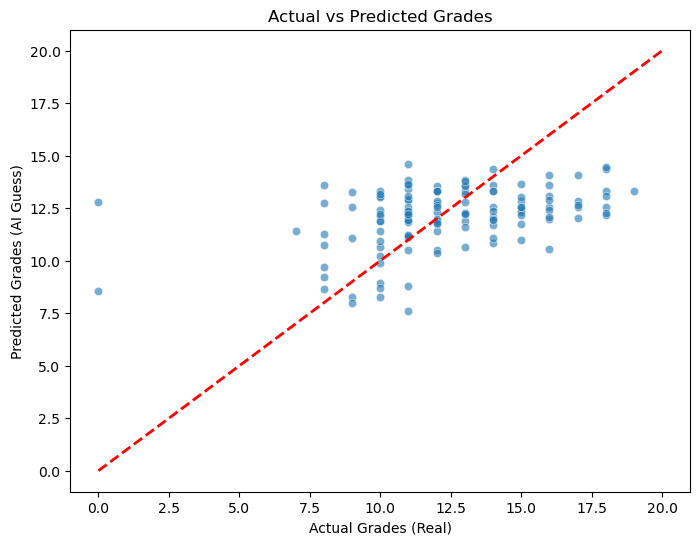

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Make Predictions
y_pred = model.predict(X_test)

# 2. Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE (Average Error): {mae:.2f}")
print(f"RMSE (Strict Error): {rmse:.2f}")
print(f"R2 Score (Explanation): {r2:.2f}")

# 3. Visualize: Actual vs. Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
# Draw the "Perfect Prediction" line (Red Dashed Line)
plt.plot([0, 20], [0, 20], 'r--', lw=2) 
plt.xlabel("Actual Grades (Real)")
plt.ylabel("Predicted Grades (AI Guess)")
plt.title("Actual vs Predicted Grades")
plt.show()

# Model Evaluation: Did we succeed?

## 1. The Metrics
* **MAE (Mean Absolute Error):** ~2.4 points.
    * *Meaning:* Our model is usually "off" by about 2.5 points. If it predicts a 12, the student might get a 10 or 14.
* **$R^2$ Score:** ~0.16 (16%).
    * *Meaning:* Our model explains 16% of the reason why grades change. The other 84% comes from things we didn't measure (like intelligence, teacher quality, or luck).

## 2. The Visual (Scatter Plot)
* Ideally, all dots should be on the **Red Line**.
* Our dots are scattered widely. This confirms that while "Motivation" (`higher`) and "Study Time" are important, they are not the *only* things that matter.

## 3. Final Verdict
We successfully built an **"Early Warning System"**. It is not perfect, but it helps identify general trends.
* **To improve accuracy:** We would need to include the student's past grades ($G1$, $G2$).
* **To improve intervention:** We can still use this model to find students with low motivation (`higher=no`) and help them early!